<p>
<font style="Times new roman"><b>TASK :</b> Prediction using Decision Tree Algorithm</br>
Language : Python</br>
IDE: Google Colab

<p>
Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pydotplus


<p>
<b> Importing and Reading Data 

Loading the iris dataset

In [ ]:
iris = datasets.load_iris()

<p>
<b> Forming the iris Dataframe 

In [ ]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target
y = pd.DataFrame(y,columns=["Target"])


In [ ]:
df = pd.concat([data,y],axis=1)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


<p>
<b>Columns Names in the Dataset

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Target                 int64
dtype: object

<p>
<b> Data Visualisation 

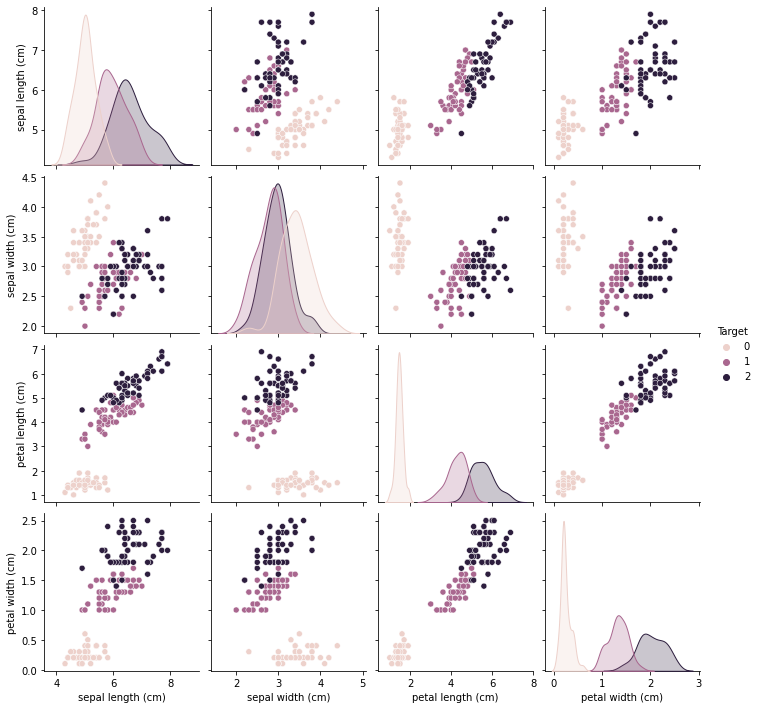

In [ ]:
sns.pairplot(df,hue="Target")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


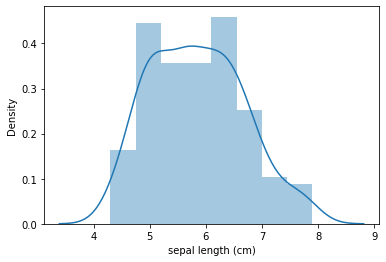

In [ ]:
sns.distplot(df["sepal length (cm)"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


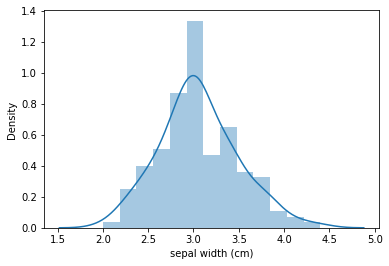

In [ ]:
sns.distplot(df["sepal width (cm)"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


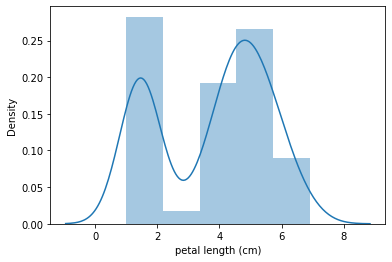

In [ ]:
sns.distplot(df["petal length (cm)"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


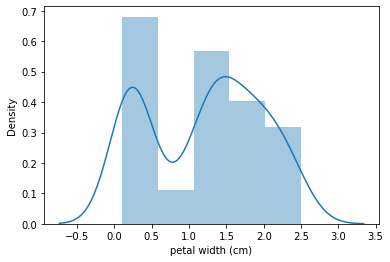

In [ ]:
sns.distplot(df["petal width (cm)"])

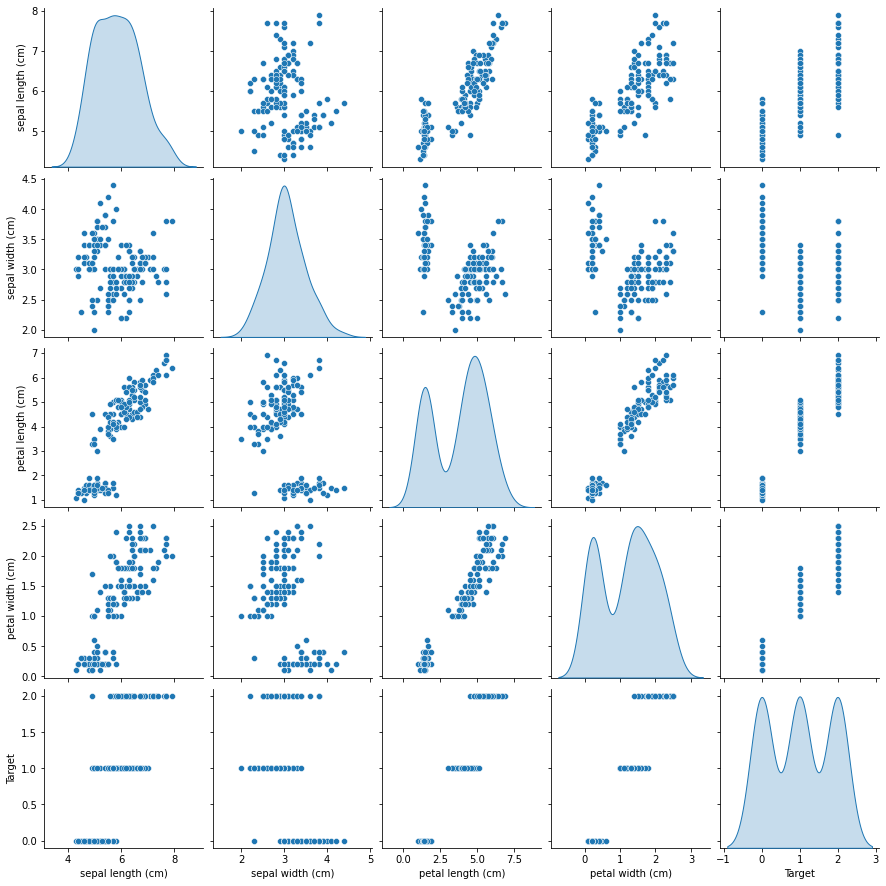

In [ ]:
sns.pairplot(df,diag_kind='kde')

<Figure size 720x576 with 0 Axes>

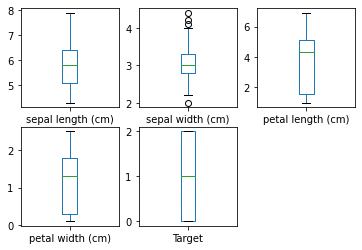

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=[10,8])
df.plot(kind="box",subplots=True, sharey=False,sharex=False,layout=(2,3))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

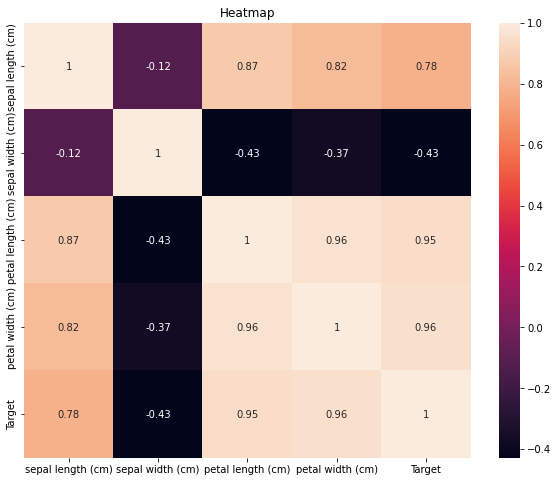

In [ ]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True) #To check correlation.
plt.title("Heatmap")
plt.show()

<b> Splitting data in x and y (Attributes and Labels Respectively)

In [ ]:
x = df.drop("Target",axis=1)
y = df.Target

<b>
Performing a Train-Test Split(Splitting the data into training and testing sets)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=123,test_size=0.2)

<b> Initializing the Decision Tree Model and Fitting the Data  

In [ ]:
clf_tree=DecisionTreeClassifier(random_state=123)
dt_fit = clf_tree.fit(xtrain,ytrain)

<b>
Prediction of the Decision Tree Model

In [ ]:
dt_predict = dt_fit.predict(xtest)

<b> Evaluation of the ML Model

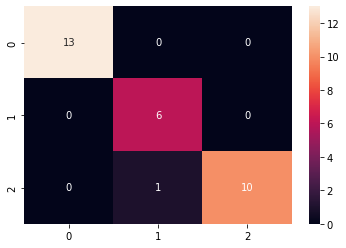

In [ ]:
sns.heatmap(confusion_matrix(ytest,dt_predict),annot=True)

In [ ]:
classificationreport = classification_report(ytest,dt_predict)
print("Classification Report is: ", classificationreport)

Classification Report is:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
accuracy = accuracy_score(ytest,dt_predict)
print("Accuracy Score is: ",accuracy)

Accuracy Score is:  0.9666666666666667


<b> Visualize the graph

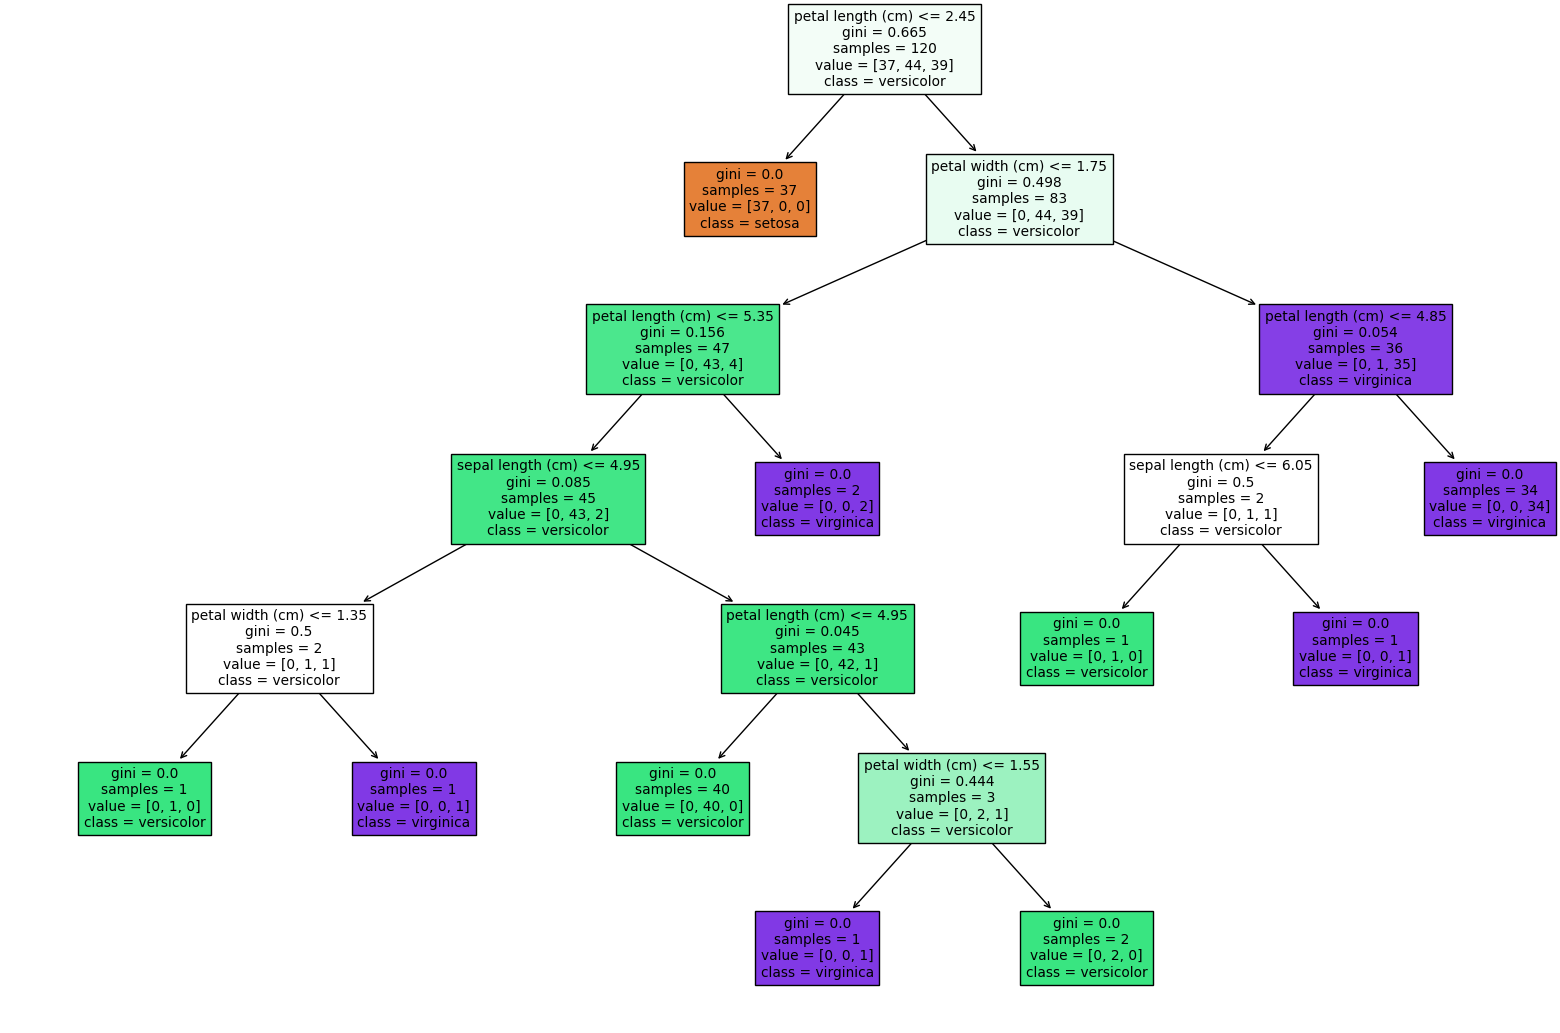

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=100)
tree.plot_tree(clf_tree,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('/content/iris.png')